In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
# ==== UKB
derivatives_folder = "/media/jaume/DATA/Data/Urblauna_SFTP/UKB_Cardiac_BIDS/derivatives"
data_path = os.path.join(derivatives_folder, 'GraphClassification')
all_edges = 'Edges-True_Norm-ZNorm_Global-True_All-True_Sim-False_BP-False'
aha_edges = 'Edges-True_Norm-ZNorm_Global-True_All-False_Sim-False_BP-False'

# =========================== ALL ===========================
study_name = 'Multiplex_HPT_UKB_DIMENSIONS_NEW_LOSS_ALL'
all_data_folder = os.path.join(data_path, all_edges, study_name)  # save_folder

# =========================== AHA ===========================
study_name = 'Multiplex_HPT_UKB_DIMENSIONS_NEW_LOSS'
aha_data_folder = os.path.join(data_path, aha_edges, study_name)  # save_folder

save_folder_ukb = os.path.join(aha_data_folder, 'latent_analysis') 

In [4]:
# ==== ACDC
derivatives_folder = '/media/jaume/DATA/Data/New_ACDC/MIDS/mixed/derivatives'
data_path = os.path.join(derivatives_folder, 'GraphClassification')
all_edges = 'Edges-True_Norm-ZNorm_Global-True_All-True_Sim-False_BP-False'
aha_edges = 'Edges-True_Norm-ZNorm_Global-True_All-False_Sim-False_BP-False'
# study_name = 'Multiplex_HPT_ACDC_ADAM_FINAL_MAE'

# =========================== ALL ===========================
study_name = 'Multiplex_HPT_ACDC_DIMENSIONS_ALL_SUM'
all_data_folder = os.path.join(data_path, all_edges, study_name)  # save_folder

# =========================== AHA ===========================
study_name = 'Multiplex_HPT_ACDC_DIMENSIONS_SUM'
aha_data_folder = os.path.join(data_path, aha_edges, study_name)  # save_folder

save_folder_acdc = os.path.join(aha_data_folder, 'latent_analysis') 

In [5]:
save_folder_plots = '/media/jaume/DATA/Data/PlotsMEDIA'
os.makedirs(save_folder_plots, exist_ok=True)

# Rigid associations
summary_df_ukb = pd.read_csv(f"{save_folder_ukb}/rf_permutation_summary_pca.csv", index_col=0)
univariate_df_ukb = pd.read_csv(os.path.join(save_folder_ukb, 'association_ukb_pc.csv'), index_col=0)

summary_df_acdc = pd.read_csv(f"{save_folder_acdc}/rf_permutation_summary_pca.csv", index_col=0)
univariate_df_acdc = pd.read_csv(os.path.join(save_folder_acdc, 'association_acdc_pc.csv'), index_col=0)

In [6]:
# univariate_df_acdc['Y_var'].unique()
lv_strain = [
    'LV_Myo_Strain_Radial_Contraction',
    'LV_Myo_Strain_Circum_Contraction',
    'LV_Myo_Strain_Radial_Relaxation',
    'LV_Myo_Strain_Circum_Relaxation',
    'LV_Myo_Strain_Radial_Early_Relaxation',
    'LV_Myo_Strain_Circum_Early_Relaxation',
    'LV_Myo_Strain_Radial_Ratio',
    'LV_Myo_Strain_Circum_Ratio',
    'LV_Myo_Strain_Radial_Ratio_Early',
    'LV_Myo_Strain_Circum_Ratio_Early',
    'LV_Myo_Max Radial Strain',
    'LV_Myo_Max Circum Strain'
]

rv_strain = [
    'RV_Myo_Strain_Radial_Contraction',
    'RV_Myo_Strain_Circum_Contraction',
    'RV_Myo_Strain_Radial_Relaxation',
    'RV_Myo_Strain_Circum_Relaxation',
    'RV_Myo_Strain_Radial_Early_Relaxation',
    'RV_Myo_Strain_Circum_Early_Relaxation',
    'RV_Myo_Strain_Radial_Ratio',
    'RV_Myo_Strain_Circum_Ratio',
    'RV_Myo_Strain_Radial_Ratio_Early',
    'RV_Myo_Strain_Circum_Ratio_Early',
    'RV_Myo_Max Radial Strain',
    'RV_Myo_Max Circum Strain'
]

lv_morphology = [
    'LV_Myo_Max Thickness', 'LV_Myo_Min Thickness', 'LV_Myo_Std Thickness', 'LV_Myo_Mean Thickness'
]

rv_morphology = [
    'RV_Myo_Max Thickness', 'RV_Myo_Min Thickness', 'RV_Myo_Std Thickness', 'RV_Myo_Mean Thickness'
]

volumes = [
    'LV_EF', 'LV_SVI', 'RV_EF', 'RV_SVI', 'LVMI', 'RVMI', 'BSA'
]

demographics = ['Age_2.0', 'Sex_0.0', 'Townsend_deprivation_index_0.0']

blood_pressure = ['SBP_2.0', 'DBP_2.0', 'PulseRate_2.0']

grip_strength = ['left_hand_grip_strength_2.0', 'right_hand_grip_strength_2.0']

pwa = [x for x in [
    'pwa_heart_rate_2.0', 'pwa_brachial_sbp_2.0', 'pwa_brachial_dbp_2.0',
    'pwa_peripheral_pulse_pressure_2.0', 'pwa_central_sbp_2.0',
    'pwa_central_pulse_pressure_2.0', 'pwa_central_augmentation_pressure_2.0',
    'pwa_cardiac_output_2.0', 'pwa_end_sp_2.0', 'pwa_end_sp_index_2.0',
    'pwa_total_peripheral_resistance_2.0', 'pwa_stroke_volume_2.0',
    'pwa_mean_arterial_pressure_2.0', 'pwa_cardiac_index_2.0'
]]

ecg = [x for x in [
    'ecg_rest_ventricular_rate_2.0', 'ecg_rest_p_duration_2.0',
    'ecg_rest_qrs_duration_2.0', 'ecg_rest_pq_interval_2.0',
    'ecg_rest_qt_interval_2.0', 'ecg_rest_qtc_interval_2.0',
    'ecg_rest_rr_interval_2.0', 'ecg_rest_pp_interval_2.0',
    'ecg_rest_p_axis_2.0', 'ecg_rest_r_axis_2.0', 'ecg_rest_t_axis_2.0',
    'ecg_rest_qrs_num_2.0'
]]

art_stiffness = [x for x in [
    'art_stiff_pulse_rate_2.0', 'art_stiff_reflection_index_2.0',
    'art_stiff_peak_to_peak_time_2.0', 'art_stiff_position_peak_2.0',
    'art_stiff_position_notch_2.0', 'art_stiff_position_shoulder_2.0',
    'art_stiff_absence_notch_2.0', 'art_stiff_stiffness_index_2.0'
]]

symptoms = ['whistling_chest_last_year_2.0', 'shortness_breath_walking_2.0', 'Chest_pain_2.0']

# proteins = [x for x in [
#     'prot_albumin_0.0', 'prot_cholesterol_0.0', 'prot_creatinine_0.0',
#     'prot_c_reactive_0.0', 'prot_glucose_0.0', 'prot_HbA1c_0.0',
#     'prot_hdl_0.0', 'prot_ldl_0.0', 'prot_tryglycerides_0.0'
# ]]

# blood = ['haemoglobin_concentration_0.0', 'haematocrit_percentage_0.0']

proteins = [x for x in [
    'prot_albumin_0.0', 'prot_cholesterol_0.0', 'prot_creatinine_0.0',
    'prot_c_reactive_0.0', 'prot_glucose_0.0', 'prot_HbA1c_0.0',
    'prot_hdl_0.0', 'prot_ldl_0.0', 'prot_tryglycerides_0.0',
    'haemoglobin_concentration_0.0', 'haematocrit_percentage_0.0']]

urine = ['urine_creatinine_0.0', 'urine_potassium_0.0', 'urine_sodium_0.0']

ultrasound = [x for x in [
    'us_min_imt_120_2.0', 'us_mean_imt_120_2.0', 'us_max_imt_120_2.0',
    'us_min_imt_150_2.0', 'us_mean_imt_150_2.0', 'us_max_imt_150_2.0',
    'us_min_imt_210_2.0', 'us_mean_imt_210_2.0', 'us_max_imt_210_2.0',
    'us_min_imt_240_2.0', 'us_mean_imt_240_2.0', 'us_max_imt_240_2.0'
]]

spirometry = ['spiro_fvc_2.0', 'spiro_pef_2.0']

In [7]:
# Helper function for pretty names
def prettify_name(name):
    name = name.replace("LV_Myo_", "LV ")
    name = name.replace("RV_Myo_", "RV ")
    name = name.replace("Strain_", "Strain - ")
    name = name.replace("Mean Thickness", "Mean Thickness")
    name = name.replace("Std Thickness", "Std. Thickness")
    name = name.replace("Max Thickness", "Max Thickness")
    name = name.replace("Min Thickness", "Min Thickness")
    name = name.replace("Max Circum Strain", "Circ. Max Strain")
    name = name.replace("Max Radial Strain", "Radial Max Strain")
    name = name.replace("Strain Circum", "Circ. Strain")
    name = name.replace("Strain Radial", "Radial Strain")
    name = name.replace("Circum", "Circ.")
    name = name.replace("Contraction", "Contr.")
    name = name.replace("Relaxation", "Relax.")
    name = name.replace("Ratio Early", "RE")

    name = name.replace("_", " ")
    name = name.replace("2.0", "")
    name = name.replace("0.0", "")        
    name = name.replace('us ', 'US - ')
    name = name.replace('ecg rest', 'ECG -')
    name = name.replace('imt', 'IMT')
    name = name.replace('qtc', 'QTC')
    name = name.replace('qt', 'QT')
    name = name.replace('pp', 'PP')
    name = name.replace('qrs', 'QRS')    
    name = name.replace('rr', 'RR')    
    name = name.replace('mean arterial pressure', 'MBP')
    name = name.replace('ventricular rate', 'VR')
    name = name.replace('heart rate', 'HR')
    name = name.replace('c reactive', 'C reactive')
    name = name.replace('hdl', 'HDL')
    name = name.replace('ldl', 'LDL')
    name = name.replace('end sp', 'end SBP')
    name = name.replace('p duration', 'P duration')
    name = name.replace('p axis', 'P axis')
    name = name.replace('t axis', 'T axis')
    name = name.replace('r axis', 'R axis')
    name = name.replace('fvc', 'FVC')
    name = name.replace('pef', 'PEF')
    name = name.replace('cardiac index', 'CI')
    name = name.replace('cardiac output', 'CO')
    name = name.replace('stroke volume', 'SV')
    name = name.replace('sbp', 'SBP')
    name = name.replace('dbp', 'DBP')
    name = name.replace('pwa', 'PWA -')
    name = name.replace('art stiff', 'AS -')
    name = name.replace('prot', 'Blood ')
    name = name.replace('urine', 'Urine ')
    name = name.replace('spiro', 'Spirometry -')
    name = name.replace("central augmentation pressure", "CAP")
    name = name.replace("peripheral pulse pressure", "PPP")
    name = name.replace("central pulse pressure", "CPP")
    name = name.replace("total peripheral resistance", "TPR")
    name = name.replace("pulse rate", "PR")
    name = name.replace("Pulse Rate", "PR")
    name = name.replace("peak to peak time", "PtoP")
    name = name.replace("position shoulder", "Pos. shoulder")
    name = name.replace("stiffness index", "Stiff. index")
    name = name.replace("position peak", "Pos. peak")
    name = name.replace("position notch", "Pos. notch")
    name = name.replace("absence notch", "Abs. notch")
    name = name.replace('left hand grip strength', 'Grip Strength Left')
    name = name.replace('right hand grip strength', 'Grip Strength Right')
    name = name.replace('Townsend deprivation index', 'Townsend Index')
    name = name.replace('shortness breath walking', 'Shortness of Breath Walking')
    name = name.replace('Chest pain', 'Chest Pain')
    name = name.strip()
    
    # Capitalize first letter
    name = name[0].upper() + name[1:]

    return name


# Order Y-axis by biomarker group
group_map_acdc = {
    **{v: "LV Strain" for v in lv_strain},
    **{v: "RV Strain" for v in rv_strain},
    **{v: "LV Morphology" for v in lv_morphology},
    **{v: "RV Morphology" for v in rv_morphology},
    **{v: "Volume/Function" for v in volumes}
}

# Flatten the full list of all variables
all_vars_acdc = (
    lv_strain + rv_strain + lv_morphology + rv_morphology + volumes
)
pretty_names_acdc = {v: prettify_name(v) for v in all_vars_acdc}

In [8]:
# Organize into groups
group_map_ukb = {
    **{v: "LV Strain" for v in lv_strain},
    **{v: "RV Strain" for v in rv_strain},
    **{v: "LV Morphology" for v in lv_morphology},
    **{v: "RV Morphology" for v in rv_morphology},
    **{v: "Volume/Function" for v in volumes},    
    **{v: "Demographics" for v in demographics},
    **{v: "Blood Pressure" for v in blood_pressure},
    **{v: "Grip Strength" for v in grip_strength},
    **{v: "PWA" for v in pwa},
    **{v: "ECG" for v in ecg},
    **{v: "Arterial Stiffness" for v in art_stiffness},
    **{v: "Symptoms" for v in symptoms},
    **{v: "Blood analysis" for v in proteins},
    **{v: "Urine analysis" for v in urine},
    **{v: "Ultrasound IMT" for v in ultrasound},
    **{v: "Spirometry" for v in spirometry}
}

# Flatten the full list of all variables
# all_vars_ukb = (
#     lv_strain + rv_strain + lv_morphology + rv_morphology + volumes +
#     demographics + blood_pressure + grip_strength + pwa + ecg + art_stiffness +
#     symptoms + proteins + blood + urine + ultrasound + spirometry
# )
all_vars_ukb = (
    lv_strain + rv_strain + lv_morphology + rv_morphology + volumes +
    demographics + blood_pressure + grip_strength + pwa + ecg + art_stiffness +
    symptoms + proteins + urine + ultrasound + spirometry
)
pretty_names_ukb = {v: prettify_name(v) for v in all_vars_ukb}

In [9]:
# group_order = [
#     "LV Strain", "RV Strain", "LV Morphology", "RV Morphology", "Volume/Function",
#     "Demographics", "Blood Pressure", "Grip Strength", "PWA", "ECG", "Arterial Stiffness",
#     "Symptoms", "Blood Proteins", "Blood Count", "Urine", "Ultrasound IMT", "Spirometry"
# ]
group_order = [
    "LV Strain", "RV Strain", "LV Morphology", "RV Morphology", "Volume/Function",
    "Demographics", "Blood Pressure", "Grip Strength", "PWA", "ECG", "Arterial Stiffness",
    "Symptoms", "Blood analysis", "Urine", "Ultrasound IMT", "Spirometry"
]

In [10]:
from statsmodels.stats.multitest import multipletests

# Apply multiple testing correction (FDR)
summary_df_ukb["fdr_corrected_p"] = multipletests(summary_df_ukb["p_value"], method="fdr_bh")[1]
summary_df_ukb["sig_marker"] = summary_df_ukb["p_value"].apply(lambda p: "*" if p < 0.1 else "")
summary_df_ukb.loc[summary_df_ukb["fdr_corrected_p"] < 0.1, "sig_marker"] = "**"

# Compute values for volcano plot
summary_df_ukb["r2_diff"] = summary_df_ukb["R2_train"] - summary_df_ukb["R2_perm_mean"]
summary_df_ukb["neg_log_p"] = -np.log10(summary_df_ukb["p_value"])

# Apply multiple testing correction (FDR)
summary_df_acdc["fdr_corrected_p"] = multipletests(summary_df_acdc["p_value"], method="fdr_bh")[1]
summary_df_acdc["sig_marker"] = summary_df_acdc["p_value"].apply(lambda p: "*" if p < 0.1 else "")
summary_df_acdc.loc[summary_df_acdc["fdr_corrected_p"] < 0.1, "sig_marker"] = "**"

# Compute values for volcano plot
summary_df_acdc["r2_diff"] = summary_df_acdc["R2_train"] - summary_df_acdc["R2_perm_mean"]
summary_df_acdc["neg_log_p"] = -np.log10(summary_df_acdc["p_value"])

In [11]:
summary_df_acdc['Dataset'] = 'ACDC'
summary_df_ukb['Dataset'] = 'UKB'
combined_df = pd.concat([summary_df_ukb, summary_df_acdc])
combined_df.rename(index=pretty_names_ukb, inplace=True)
combined_df

,R2_train,R2_perm_mean,R2_perm_std,p_value,fdr_corrected_p,sig_marker,r2_diff,neg_log_p,Dataset
LV Strain - Radial Contr.,0.182533,0.148943,0.025490,0.099502,0.981075,*,0.033589,1.002166,UKB
LV Strain - Circ. Contr.,0.196498,0.150332,0.024779,0.034826,0.981075,*,0.046166,1.458098,UKB
LV Strain - Radial Relax.,0.175955,0.147982,0.023997,0.119403,0.981075,,0.027973,0.922985,UKB
LV Strain - Circ. Relax.,0.194558,0.146978,0.026836,0.049751,0.981075,*,0.047581,1.303196,UKB
LV Strain - Radial Early Relax.,0.126161,0.147981,0.022907,0.810945,1.000000,,-0.021821,0.091008,UKB
...,...,...,...,...,...,...,...,...,...
RV EF,0.189627,0.272853,0.050961,0.950249,0.985075,,-0.083225,0.022163,ACDC
LV SVI,0.292714,0.272329,0.050264,0.278607,0.985075,,0.020385,0.555008,ACDC
LV EF,0.281823,0.272378,0.043474,0.457711,0.985075,,0.009445,0.339408,ACDC
RVMI,0.229839,0.274697,0.049441,0.781095,0.985075,,-0.044858,0.107296,ACDC


<built-in method index of list object at 0x7fb73bdab540>
<built-in method index of list object at 0x7fb73b75ba00>
<built-in method index of list object at 0x7fb73b75a9c0>
<built-in method index of list object at 0x7fb73b775580>
<built-in method index of list object at 0x7fb73b775400>
<built-in method index of list object at 0x7fb73b775c40>


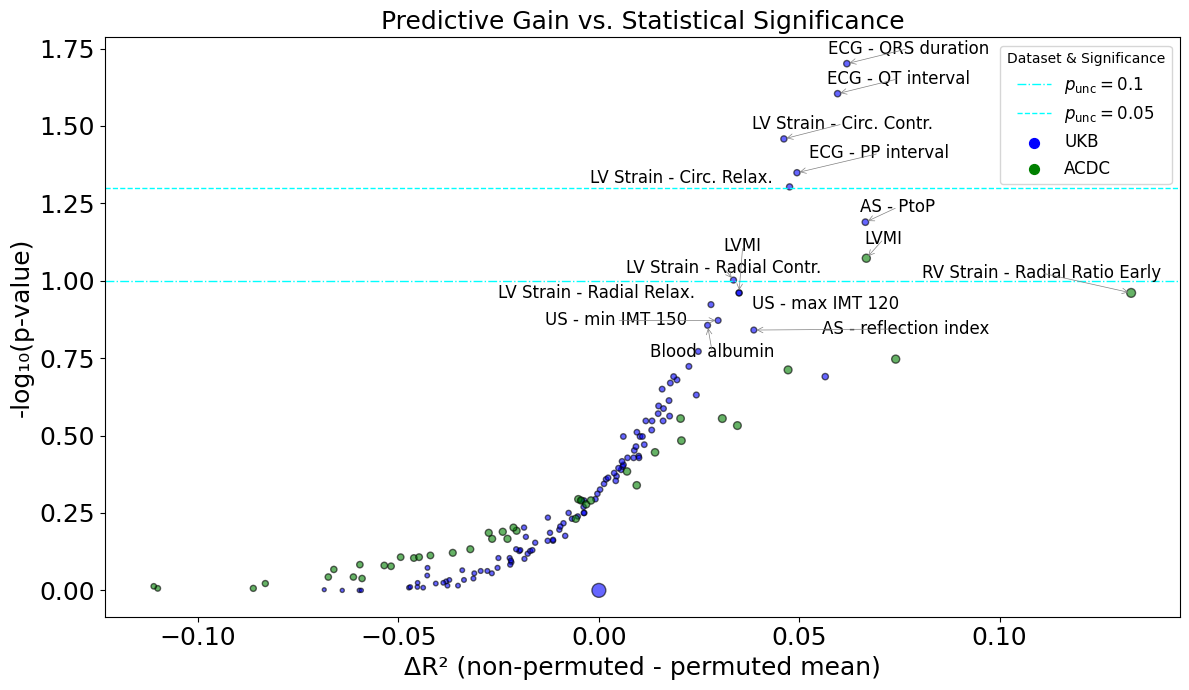

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [17]:
from collections import defaultdict
import matplotlib as mpl
from adjustText import adjust_text

# fontsize_labels = 18
fontsize_labels = 18
mpl.rcParams.update({
    'axes.titlesize': 18,
    'axes.labelsize': fontsize_labels,
    'xtick.labelsize': fontsize_labels,
    'ytick.labelsize': fontsize_labels,
    'legend.fontsize': 12
})

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
scatter = ax.scatter(
    combined_df["r2_diff"],
    combined_df["neg_log_p"],
    c=combined_df["Dataset"].map({"UKB": "blue", "ACDC": "green"}),
    s=combined_df["R2_train"] * 100,
    alpha=0.6,
    edgecolors='k'
)

# Significance lines
p_01 = -np.log10(0.1)
p_005 = -np.log10(0.05)
plt.axhline(p_01,  linestyle="-.", color="cyan", linewidth=1, label=r'$p_{\mathrm{unc}}=0.1$')
plt.axhline(p_005, linestyle="--", color="cyan", linewidth=1, label=r'$p_{\mathrm{unc}}=0.05$')

# Labels
plt.xlabel("ΔR² (non-permuted - permuted mean)")
plt.ylabel("-log₁₀(p-value)")
plt.title("Predictive Gain vs. Statistical Significance")

# Significant subset
significant = combined_df[combined_df["p_value"] < 0.15].copy()
significant = significant.sort_values("neg_log_p", ascending=False)

# Bucket by rounded x to simulate collision detection
bucketed = defaultdict(list)
for (idx, row) in significant.iterrows():
    bucket_key = round(row["r2_diff"], 2)
    bucketed[bucket_key].append((idx, row))

annotated_positions = []  # Keep track of previous label positions
texts = []

# Tolerance for y-axis overlap (in neg_log_p units)
min_dy = 0.04
min_dx = 0.04

for key, entries in bucketed.items():
    n = len(entries)
    spread = np.linspace(-0.06, 0.06, n) #+ 0.05
    print(entries.index)
    for i, (idx, row) in enumerate(entries):
        x, y = row["r2_diff"], row["neg_log_p"]
        offset = spread[i]
        label_x = x + offset #* np.random.uniform(1)
        label_y = y + 0.04 #* np.random.uniform(1)
        
        # Default alignment
        ha, va = 'center', 'bottom'

        # Check for overlap
        good_to_go = False
        internal_iters = 0 
        while not good_to_go:
            good_to_go = True
            internal_iters += 1
            for prev_x, prev_y in annotated_positions:
                if abs(label_x - prev_x) < min_dx and abs(label_y - prev_y) < min_dy:
                    # Adjust alignment to avoid stack overlap
                    if label_y <= prev_y:
                        va = 'top' if va == 'bottom' else 'bottom'
                    if label_x < prev_x:
                        ha = 'left' if ha == 'right' else 'left'
                    label_y = y + 0.04 * np.random.uniform(1) if 'va' == 'bottom' else y - 0.04 * np.random.uniform(1)
                    label_y += (internal_iters-1) * 0.001                    
                    label_x = offset * -1 * np.random.uniform(1) + (internal_iters-1) * 0.001
                    label_x = min(np.abs(label_x), 0.1) * np.sign(label_x)
                    label_y = min(np.abs(label_y), 0.1) * np.sign(label_y)
                    good_to_go = False

        annotated_positions.append((label_x, label_y))

        texts.append(
        # ax.annotate(
        #     idx,
        #     (x, y),
        #     xytext=(label_x, label_y),
        #     textcoords='data',
        #     fontsize=12,
        #     ha=ha,
        #     va=va,
        #     arrowprops=dict(arrowstyle='->', lw=0.7, color='gray')
        # )
        ax.text(x, y, idx, fontsize=12, ha=ha, va=va)
        )

adjust_text(
    texts,
    ax=ax,
    expand_text=(1.2, 1.4),
    arrowprops=dict(arrowstyle='->', color='gray', lw=0.5)
)

# Scatter back
scatter.set_zorder(1)

# Add combined legend
for dataset, color in zip(["UKB", "ACDC"], ["blue", "green"]):
    plt.scatter([], [], c=color, label=dataset, s=50)
plt.legend(title="Dataset & Significance")

plt.grid(False)
plt.tight_layout()
plt.show()

fig.savefig(os.path.join(save_folder_plots, 'Volcano.eps'), format='eps', dpi=300, bbox_inches="tight")
fig.savefig(os.path.join(save_folder_plots, 'Volcano.pdf'), format='pdf', dpi=300, bbox_inches="tight")

In [13]:
# Helper function for pretty names
def prettify_name_two(name):
    name = name.replace("LV_Myo_", "LV ")
    name = name.replace("RV_Myo_", "RV ")
    name = name.replace("Strain_", "Strain - ")
    name = name.replace("Mean Thickness", "Mean Thickness")
    name = name.replace("Std Thickness", "Std. Thickness")
    name = name.replace("Max Thickness", "Max Thickness")
    name = name.replace("Min Thickness", "Min Thickness")
    name = name.replace("Max Circum Strain", "Circ. Max Strain")
    name = name.replace("Max Radial Strain", "Radial Max Strain")
    name = name.replace("Strain Circum", "Circ. Strain")
    name = name.replace("Strain Radial", "Radial Strain")
    name = name.replace("Circum", "Circ.")
    name = name.replace("Contraction", "Contr.")
    name = name.replace("Relaxation", "Relax.")
    name = name.replace("Ratio Early", "RE")
    name = name.replace("LV Strain - ", "")
    name = name.replace("RV Strain - ", "")
    name = name.replace("LV Radial", "Radial")
    name = name.replace("RV Radial", "Radial")
    name = name.replace("LV Circ.", "Circ.")
    name = name.replace("RV Circ.", "Circ.")
    name = name.replace("LV Max", "Max")
    name = name.replace("RV Max", "Max")
    name = name.replace("LV Min", "Min")
    name = name.replace("RV Min", "Min")
    name = name.replace("LV Mean", "Mean")
    name = name.replace("RV Mean", "Mean")

    name = name.replace("_", " ")
    name = name.replace("2.0", "")
    name = name.replace("0.0", "")        
    name = name.replace('percentage', '[%]')
    name = name.replace('concentration', '')
    # name = name.replace('us ', 'US - ')
    name = name.replace('us ', '')
    name = name.replace('ecg rest', '')
    name = name.replace('imt', 'IMT')
    name = name.replace('qtc', 'QTC')
    name = name.replace('qt', 'QT')
    name = name.replace('pp', 'PP')
    name = name.replace('qrs', 'QRS')    
    name = name.replace('rr', 'RR')
    name = name.replace('Pq', 'PQ')    
    name = name.replace('mean arterial pressure', 'MBP')
    name = name.replace('ventricular rate', 'VR')
    name = name.replace('heart rate', 'HR')
    name = name.replace('c reactive', 'C reactive')
    name = name.replace('hdl', 'HDL')
    name = name.replace('ldl', 'LDL')
    name = name.replace('end sp', 'end SBP')
    name = name.replace('p duration', 'P duration')
    name = name.replace('p axis', 'P axis')
    name = name.replace('t axis', 'T axis')
    name = name.replace('r axis', 'R axis')
    name = name.replace('fvc', 'FVC')
    name = name.replace('pef', 'PEF')
    name = name.replace('cardiac index', 'CI')
    name = name.replace('cardiac output', 'CO')
    name = name.replace('stroke volume', 'SV')
    name = name.replace('sbp', 'SBP')
    name = name.replace('dbp', 'DBP')
    name = name.replace('pwa', '')
    name = name.replace('art stiff', '')
    # name = name.replace('prot', 'PV: ')
    # name = name.replace('urine', 'PV: Urine ')
    name = name.replace('prot', '')
    name = name.replace('urine', '')
    name = name.replace('spiro', '')
    name = name.replace("central augmentation pressure", "CAP")
    name = name.replace("peripheral pulse pressure", "PPP")
    name = name.replace("central pulse pressure", "CPP")
    name = name.replace("total peripheral resistance", "TPR")
    name = name.replace("pulse rate", "PR")
    name = name.replace("PulseRate", "PR")
    name = name.replace("peak to peak time", "PtoP")
    name = name.replace("position shoulder", "Pos. shoulder")
    name = name.replace("stiffness index", "Stiff. index")
    name = name.replace("position peak", "Pos. peak")
    name = name.replace("position notch", "Pos. notch")
    name = name.replace("absence notch", "Abs. notch")
    name = name.replace('left hand grip strength', 'Left')
    name = name.replace('right hand grip strength', 'Right')
    name = name.replace('Townsend deprivation index', 'Townsend Index')
    name = name.replace('shortness breath walking', 'Breath Short. Walk.')
    name = name.replace('chest last year', 'chest')
    name = name.replace('Chest pain', 'Chest Pain')    
    name = name.strip()
    
    # Capitalize first letter
    name = name[0].upper() + name[1:]

    return name


# Order Y-axis by biomarker group
group_map_acdc = {
    **{v: "LV Strain" for v in lv_strain},
    **{v: "RV Strain" for v in rv_strain},
    **{v: "LV Morphology" for v in lv_morphology},
    **{v: "RV Morphology" for v in rv_morphology},
    **{v: "Volume/Function" for v in volumes}
}

# Flatten the full list of all variables
all_vars_acdc = (
    lv_strain + rv_strain + lv_morphology + rv_morphology + volumes
)
pretty_names_acdc = {v: prettify_name_two(v) for v in all_vars_acdc}

# Organize into groups
group_map_ukb = {
    **{v: "LV Strain" for v in lv_strain},
    **{v: "RV Strain" for v in rv_strain},
    **{v: "LV Morphology" for v in lv_morphology},
    **{v: "RV Morphology" for v in rv_morphology},
    **{v: "Volume/Function" for v in volumes},    
    **{v: "Demographics" for v in demographics},
    **{v: "Blood Pressure" for v in blood_pressure},
    **{v: "Grip Strength" for v in grip_strength},
    **{v: "PWA" for v in pwa},
    **{v: "ECG" for v in ecg},
    **{v: "Arterial Stiffness" for v in art_stiffness},
    **{v: "Symptoms" for v in symptoms},
    **{v: "Blood analysis" for v in proteins},
    **{v: "Urine analysis" for v in urine},
    **{v: "Ultrasound IMT" for v in ultrasound},
    **{v: "Spirometry" for v in spirometry}
}

# Flatten the full list of all variables
# all_vars_ukb = (
#     lv_strain + rv_strain + lv_morphology + rv_morphology + volumes +
#     demographics + blood_pressure + grip_strength + pwa + ecg + art_stiffness +
#     symptoms + proteins + blood + urine + ultrasound + spirometry
# )
all_vars_ukb = (
    lv_strain + rv_strain + lv_morphology + rv_morphology + volumes +
    demographics + blood_pressure + grip_strength + pwa + ecg + art_stiffness +
    symptoms + proteins + urine + ultrasound + spirometry
)
pretty_names_ukb = {v: prettify_name_two(v) for v in all_vars_ukb}

In [14]:


# Step 5: Create heatmap data (only significant correlations)
# heatmap_data = assoc_df[assoc_df['Significant']].pivot(index='Y_var', columns='X_var', values='Correlation')
heatmap_data = univariate_df_acdc[univariate_df_acdc['Significant']].pivot(index='Y_var', columns='PC', values='Correlation')
heatmap_data = univariate_df_acdc[univariate_df_acdc['Significant_NC']].pivot(index='Y_var', columns='PC', values='Correlation')
# heatmap_data = assoc_df.pivot(index='Y_var', columns='PC', values='Correlation')

# Drop rows/columns with all NaNs
heatmap_data = heatmap_data.dropna(how='all', axis=0).dropna(how='all', axis=1)
# heatmap_data

# X-axis order
heatmap_data = heatmap_data[sorted(heatmap_data.columns, key=lambda x: int(x.replace("PC", "")))]

row_order_df = pd.DataFrame({
    "variable": heatmap_data.index,
    "group": heatmap_data.index.map(group_map_acdc)
})
row_order_df.sort_values(by=["group", "variable"], inplace=True)
heatmap_data = heatmap_data.loc[row_order_df["variable"]]

# # Rename them
# heatmap_data.rename(index=pretty_names, inplace=True)

# Threshold weak correlations
thresh = 0.05
mask = heatmap_data.abs().max(axis=1) > thresh
heatmap_data = heatmap_data[mask]
heatmap_data = heatmap_data.loc[heatmap_data.abs().max(axis=1) > 0]
heatmap_data = heatmap_data.loc[:, heatmap_data.abs().max(axis=0) > 0]


# Sort by correlation
# df = heatmap_data.copy().astype(float)
# df['max_corr'] = df.abs().max(axis=1)
# df['group'] = df.index.map(group_map_acdc)
# df_sorted = df.sort_values(['group', 'max_corr'], ascending=[True, False])
# df_sorted = df_sorted.drop(columns=['group', 'max_corr'])
# heatmap_data = df_sorted.copy()

ordered_vars = []
seen = set()
# Iterate through PCs (columns) left to right
for pc in heatmap_data.columns:
    # Identify variables with meaningful correlation
    candidates = heatmap_data.index[heatmap_data[pc].abs() > thresh]
    
    # Add to ordered list only if not seen before
    for var in candidates:
        if var not in seen:
            ordered_vars.append(var)
            seen.add(var)

# Optional: Add the remaining variables (with no strong correlations)
remaining = [v for v in heatmap_data.index if v not in seen]
ordered_vars.extend(remaining)
heatmap_data = heatmap_data.loc[ordered_vars]

In [15]:
# heatmap_data

In [16]:
# import matplotlib as mpl
# # fontsize_labels = 18
# fontsize_labels = 10
# mpl.rcParams.update({
#     'axes.titlesize': 18,
#     'axes.labelsize': fontsize_labels,
#     'xtick.labelsize': fontsize_labels,
#     'ytick.labelsize': fontsize_labels,
#     'legend.fontsize': 10
# })

# colormap = 'RdBu_r'  # coolwarm
# heatmap_plot = heatmap_data.copy()
# heatmap_plot.rename(index=pretty_names_acdc, inplace=True)

# # Create the clustermap
# g = sns.clustermap(
#     heatmap_plot,
#     method='average',
#     cmap=colormap,
#     center=0,
#     linewidths=0.5,
#     linecolor='gray',         # Set gridline color
#     figsize=(15, 15),
#     col_cluster=False,
#     row_cluster=False,
#     cbar=False,
# )

# # Manually add a horizontal colorbar on top
# from matplotlib.colorbar import Colorbar
# from mpl_toolkits.axes_grid1 import make_axes_locatable

# # Create new colorbar axis above the heatmap
# divider = make_axes_locatable(g.ax_heatmap)
# cax = divider.append_axes("top", size="5%", pad=0.5)

# # Create colorbar
# norm = plt.Normalize(vmin=heatmap_data.min().min(), vmax=heatmap_data.max().max())
# sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
# cbar = g.fig.colorbar(sm, cax=cax, orientation='horizontal')
# cbar.set_label("Correlation", fontsize=15)
# cbar.ax.tick_params(labelsize=13)

# # Remove dendrogram axes (even though clustering is disabled, the space remains)
# g.ax_row_dendrogram.set_visible(False)
# g.ax_col_dendrogram.set_visible(False)

# # Ensure labels are explicitly set
# # g.ax_heatmap.set_yticks(np.arange(len(heatmap_data.index)))
# # g.ax_heatmap.set_yticklabels(heatmap_data.index, fontsize=13, va='center')

# # Annotate strong associations
# # threshold = 0.15
# # for y_idx, row in enumerate(heatmap_data.values):
# #     for x_idx, val in enumerate(row):
# #         if abs(val) >= threshold:
# #             g.ax_heatmap.text(x_idx + 0.5, y_idx + 0.5, f"{val:.2f}",
# #                     ha='center', va='center', fontsize=8, color='black', fontweight='bold')

# # Ensure labels are explicitly set
# n_rows = heatmap_data.shape[0]
# g.ax_heatmap.set_yticks(np.arange(n_rows) + 0.5)
# # g.ax_heatmap.set_yticks(np.arange(len(heatmap_data.index)))
# g.ax_heatmap.set_yticklabels(heatmap_plot.index, fontsize=fontsize_labels, va='center')

# # Remove labels
# g.ax_heatmap.set_xlabel("")
# g.ax_heatmap.set_ylabel("")

# # Remove any axes left behind
# for ax in g.fig.axes:
#     if not hasattr(ax, 'has_data') or not ax.has_data():
#         ax.remove()

# # Resize heatmap to fill the space
# g.ax_heatmap.set_position([0.1, 0.1, 0.75, 0.75])  # [left, bottom, width, height]

# plt.show()

# # Save the cleaned-up version
# # g.fig.savefig(os.path.join(save_folder, 'clustermap_correlations.eps'), dpi=300, bbox_inches='tight', format='eps')

In [30]:
print(len(heatmap_data.columns))

21


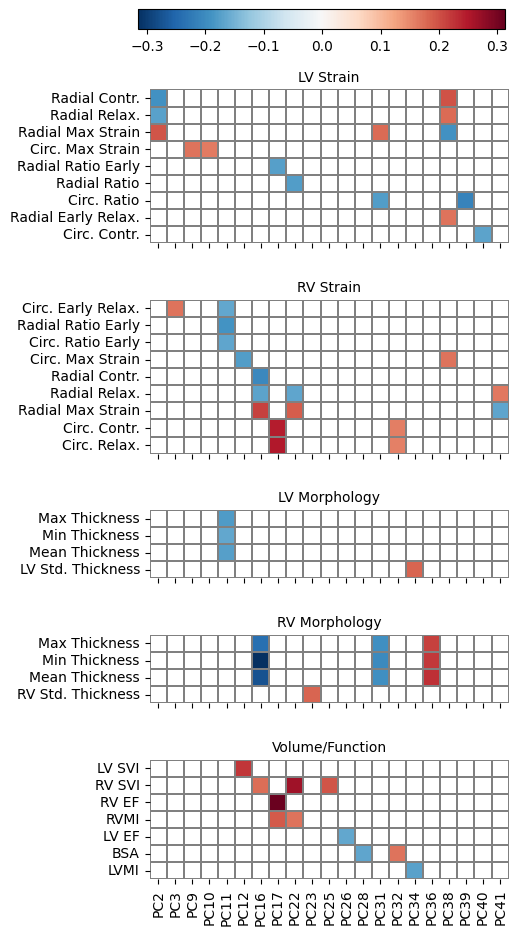

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def sort_df_on_columns(df_to_sort):
    ordered_vars = []
    seen = set()
    # Iterate through PCs (columns) left to right
    for pc in df_to_sort.columns:
        # Identify variables with meaningful correlation
        candidates = df_to_sort.index[df_to_sort[pc].abs() > thresh]
        
        # Add to ordered list only if not seen before
        for var in candidates:
            if var not in seen:
                ordered_vars.append(var)
                seen.add(var)

    # Optional: Add the remaining variables (with no strong correlations)
    remaining = [v for v in df_to_sort.index if v not in seen]
    ordered_vars.extend(remaining)

    return ordered_vars

fontsize_labels = 10
mpl.rcParams.update({
    'axes.titlesize': fontsize_labels,
    'axes.labelsize': fontsize_labels,
    'xtick.labelsize': fontsize_labels,
    'ytick.labelsize': fontsize_labels,
    'legend.fontsize': fontsize_labels
})

cmap = 'RdBu_r'

# Assume heatmap_data and group_map_ukb are already defined
# groups = set(group_map_acdc.values())
grouped_vars = [
    [var for var, g in group_map_acdc.items() if g == group and var in heatmap_data.index]
    for group in group_order
]
grouped_vars = [g for g in grouped_vars if g]
groups = [g for g, vars_ in zip(group_order, grouped_vars) if vars_]

# Sort variables within each group by correlation to first few PCs
sorted_grouped_vars = []
for vars_ in grouped_vars:
    corr_matrix = heatmap_data.loc[vars_, heatmap_data.columns]
    sorted_vars = sort_df_on_columns(corr_matrix.copy())
    # candidates = heatmap_data.index[heatmap_data[pc].abs() > thresh]
    # sort_order = np.argsort(-np.abs(corr_matrix.iloc[:, :5].values).sum(axis=1))
    # sorted_vars = [vars_[i] for i in sort_order]
    sorted_grouped_vars.append(sorted_vars)

row_height = 0.4  # Reduce from 1
height_ratios = np.array([len(group) for group in sorted_grouped_vars])
height_ratios = height_ratios / height_ratios.sum()  # Normalize to sum to 1

total_height = 10  # Fixed height; you can tweak this
# fig_width = 20     # Optional, or based on number of PCs
fig_width = heatmap_data.shape[1] * 0.5

fig, axes = plt.subplots(
    nrows=len(groups),
    figsize=(fig_width, total_height),
    gridspec_kw={'height_ratios': height_ratios},
    sharex=True
)

if len(groups) == 1:
    axes = [axes]

vmin, vmax = heatmap_data.min().min(), heatmap_data.max().max()
# heatmap_plot = heatmap_data.copy()
# heatmap_plot.rename(index=pretty_names, inplace=True)

for ax, group, vars_in_group in zip(axes, groups, sorted_grouped_vars):
    heatmap_gdata = heatmap_data.loc[vars_in_group].copy()
    sns.heatmap(
        heatmap_gdata,
        ax=ax,
        cmap=cmap,
        center=0,
        vmin=vmin,
        vmax=vmax,
        linewidths=0.2,
        linecolor='gray',
        square=True,
        cbar=False,
        xticklabels=True,
        yticklabels=True
    )
    ax.set_title(group, fontsize=fontsize_labels, loc='center')
    ax.set_ylabel("")
    ax.set_xlabel("")  # keep blank here; we'll set it at the bottom manually

    n_rows = heatmap_gdata.shape[0]
    heatmap_plot = heatmap_gdata.copy()
    heatmap_plot.rename(index=pretty_names_acdc, inplace=True)
    ax.set_yticks(np.arange(n_rows) + 0.5)
    ax.set_yticklabels(heatmap_plot.index, fontsize=fontsize_labels, va='center')


# Tighten
# fig.tight_layout()

# fig.tight_layout()

# Add colorbar on top, stretched
fig.subplots_adjust(top=0.9, hspace=0.5)
# fig.subplots_adjust(hspace=1)
cbar_ax = fig.add_axes([0.33, 0.96, 0.35, 0.02])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fig.colorbar(sm, cax=cbar_ax, orientation='horizontal', label='Correlation')
fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')

# # Add colorbar on top, stretched
# # fig.subplots_adjust(top=0.91, hspace=0.3)
# fig.subplots_adjust(top=0.945, hspace=0.05)
# cbar_ax = fig.add_axes([0.32, 0.96, 0.35, 0.02])  # left, bottom, width, height
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fig.colorbar(sm, cax=cbar_ax, orientation='horizontal', label='Correlation')

plt.show()

fig.savefig(os.path.join(save_folder_plots, 'acdc_spearman_aha.eps'), format='eps', dpi=300, bbox_inches='tight')


In [18]:
30 / (len(group_map_ukb) / len(group_map_acdc))

10.446428571428571

In [34]:
# ============== UKB

In [35]:


# Step 5: Create heatmap data (only significant correlations)
# heatmap_data = assoc_df[assoc_df['Significant']].pivot(index='Y_var', columns='X_var', values='Correlation')
heatmap_data = univariate_df_ukb[univariate_df_ukb['Significant']].pivot(index='Y_var', columns='PC', values='Correlation')
heatmap_data = univariate_df_ukb[univariate_df_ukb['Significant_NC']].pivot(index='Y_var', columns='PC', values='Correlation')
# heatmap_data = assoc_df.pivot(index='Y_var', columns='PC', values='Correlation')

# Drop rows/columns with all NaNs
heatmap_data = heatmap_data.dropna(how='all', axis=0).dropna(how='all', axis=1)
# heatmap_data

# X-axis order
heatmap_data = heatmap_data[sorted(heatmap_data.columns, key=lambda x: int(x.replace("PC", "")))]

# # Order Y-axis by biomarker group
# group_map = {
#     **{v: "LV Strain" for v in lv_strain},
#     **{v: "RV Strain" for v in rv_strain},
#     **{v: "LV Morphology" for v in lv_morphology},
#     **{v: "RV Morphology" for v in rv_morphology},
#     **{v: "Volume/Function" for v in volumes}
# }

# row_order_df = pd.DataFrame({
#     "variable": heatmap_data.index,
#     "group": heatmap_data.index.map(group_map)
# })
# row_order_df.sort_values(by=["group", "variable"], inplace=True)
# heatmap_data = heatmap_data.loc[row_order_df["variable"]]

# Threshold weak correlations
thresh = 0.05
mask = heatmap_data.abs().max(axis=1) > thresh
heatmap_data = heatmap_data[mask]
heatmap_data = heatmap_data.loc[heatmap_data.abs().max(axis=1) > 0]
heatmap_data = heatmap_data.loc[:, heatmap_data.abs().max(axis=0) > 0]

# Sort by correlation
df = heatmap_data.copy().astype(float)
df['max_corr'] = df.abs().max(axis=1)
df['group'] = df.index.map(group_map_ukb)
df_sorted = df.sort_values(['group', 'max_corr'], ascending=[True, False])
df_sorted = df_sorted.drop(columns=['group', 'max_corr'])
heatmap_data = df_sorted.copy()

ordered_vars = []
seen = set()
# Iterate through PCs (columns) left to right
for pc in heatmap_data.columns:
    # Identify variables with meaningful correlation
    candidates = heatmap_data.index[heatmap_data[pc].abs() > thresh]
    
    # Add to ordered list only if not seen before
    for var in candidates:
        if var not in seen:
            ordered_vars.append(var)
            seen.add(var)

# Optional: Add the remaining variables (with no strong correlations)
remaining = [v for v in heatmap_data.index if v not in seen]
ordered_vars.extend(remaining)
heatmap_data = heatmap_data.loc[ordered_vars]

# # Optional: define custom group order
# custom_order = ["LV Strain", "RV Strain", "LV Morphology", "RV Morphology", 
#                 "Volume/Function", "PWA", "ECG", "Blood Proteins", "Arterial Stiffness",
#                 "Demographics", "Symptoms", "Blood Count", "Urine", "Ultrasound IMT",
#                 "Blood Pressure", "Grip Strength", "Spirometry"]
# heatmap_data['Group'] = heatmap_data.index.map(group_map_ukb)
# heatmap_data['Group'] = pd.Categorical(heatmap_data['Group'], categories=custom_order, ordered=True)
# heatmap_data = heatmap_data.sort_values('Group').drop(columns='Group')

# # Organize rows by group, then within each group by max association across PCs
# heatmap_abs = heatmap_data.abs()
# ordered_rows = []
# for group in custom_order:
#     vars_in_group = [var for var in heatmap_data.index if group_map_ukb.get(var) == group]
#     vars_sorted = sorted(vars_in_group, key=lambda v: heatmap_abs.loc[v].max(), reverse=True)
#     ordered_rows.extend(vars_sorted)
# heatmap_data = heatmap_data.loc[ordered_rows]

# Rename them
# heatmap_data.rename(index=pretty_names, inplace=True)

In [36]:
# import matplotlib as mpl
# fontsize_labels = 10
# mpl.rcParams.update({
#     'axes.titlesize': 18,
#     'axes.labelsize': fontsize_labels,
#     'xtick.labelsize': fontsize_labels,
#     'ytick.labelsize': fontsize_labels,
#     'legend.fontsize': 10
# })

# colormap = 'RdBu_r'  # coolwarm
# heatmap_plot = heatmap_data.copy()
# heatmap_plot.rename(index=pretty_names_ukb, inplace=True)

# # Create the clustermap
# g = sns.clustermap(
#     heatmap_plot,
#     method='average',
#     cmap=colormap,
#     center=0,
#     linewidths=0.5,
#     linecolor='gray',         # Set gridline color
#     figsize=(15, 15),
#     col_cluster=False,
#     row_cluster=False,
#     square=True,
#     cbar=False,
# )

# # Manually add a horizontal colorbar on top
# from matplotlib.colorbar import Colorbar
# from mpl_toolkits.axes_grid1 import make_axes_locatable

# # Create new colorbar axis above the heatmap
# divider = make_axes_locatable(g.ax_heatmap)
# cax = divider.append_axes("top", size="5%", pad=0.5)

# # Create colorbar
# norm = plt.Normalize(vmin=heatmap_data.min().min(), vmax=heatmap_data.max().max())
# sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
# cbar = g.fig.colorbar(sm, cax=cax, orientation='horizontal')
# cbar.set_label("Correlation", fontsize=15)
# cbar.ax.tick_params(labelsize=13)

# # Remove dendrogram axes (even though clustering is disabled, the space remains)
# g.ax_row_dendrogram.set_visible(False)
# g.ax_col_dendrogram.set_visible(False)

# # Ensure labels are explicitly set
# # g.ax_heatmap.set_yticks(np.arange(len(heatmap_data.index)))
# # g.ax_heatmap.set_yticklabels(heatmap_data.index, fontsize=13, va='center')

# # Annotate strong associations
# # threshold = 0.15
# # for y_idx, row in enumerate(heatmap_data.values):
# #     for x_idx, val in enumerate(row):
# #         if abs(val) >= threshold:
# #             g.ax_heatmap.text(x_idx + 0.5, y_idx + 0.5, f"{val:.2f}",
# #                     ha='center', va='center', fontsize=8, color='black', fontweight='bold')

# # Ensure labels are explicitly set
# n_rows = heatmap_data.shape[0]
# g.ax_heatmap.set_yticks(np.arange(n_rows) + 0.5)
# # g.ax_heatmap.set_yticks(np.arange(len(heatmap_data.index)))
# g.ax_heatmap.set_yticklabels(heatmap_plot.index, fontsize=fontsize_labels, va='center')

# # Remove labels
# g.ax_heatmap.set_xlabel("")
# g.ax_heatmap.set_ylabel("")

# # Remove any axes left behind
# for ax in g.fig.axes:
#     if not hasattr(ax, 'has_data') or not ax.has_data():
#         ax.remove()

# # Resize heatmap to fill the space
# g.ax_heatmap.set_position([0.1, 0.1, 0.75, 0.75])  # [left, bottom, width, height]

# plt.show()

# # Save the cleaned-up version
# # g.fig.savefig(os.path.join(save_folder, 'clustermap_correlations.eps'), dpi=300, bbox_inches='tight', format='eps')

In [37]:
# Organize into groups
group_map_ukb = {
    **{v: "LV Strain" for v in lv_strain},
    **{v: "RV Strain" for v in rv_strain},
    **{v: "LV Morphology" for v in lv_morphology},
    **{v: "RV Morphology" for v in rv_morphology},
    **{v: "Volume/Function" for v in volumes},    
    **{v: "Demographics" for v in demographics},
    **{v: "Blood Pressure" for v in blood_pressure},
    **{v: "Grip Strength" for v in grip_strength},
    **{v: "PWA" for v in pwa},
    **{v: "ECG" for v in ecg},
    **{v: "Arterial Stiffness" for v in art_stiffness},
    **{v: "Symptoms" for v in symptoms},
    **{v: "Blood analysis" for v in proteins},
    **{v: "Urine analysis" for v in urine},
    **{v: "Ultrasound IMT" for v in ultrasound},
    **{v: "Spirometry" for v in spirometry}
}

# Flatten the full list of all variables
# all_vars_ukb = (
#     lv_strain + rv_strain + lv_morphology + rv_morphology + volumes +
#     demographics + blood_pressure + grip_strength + pwa + ecg + art_stiffness +
#     symptoms + proteins + blood + urine + ultrasound + spirometry
# )
all_vars_ukb = (
    lv_strain + rv_strain + lv_morphology + rv_morphology + volumes +
    demographics + blood_pressure + grip_strength + pwa + ecg + art_stiffness +
    symptoms + proteins + urine + ultrasound + spirometry
)
pretty_names_ukb = {v: prettify_name_two(v) for v in all_vars_ukb}

group_order = [
    "LV Strain", "RV Strain", "LV Morphology", "RV Morphology", "Volume/Function",
    "Demographics", "Blood Pressure", "Grip Strength", "PWA", "ECG", "Arterial Stiffness",
    "Symptoms", "Blood analysis", "Urine analysis", "Ultrasound IMT", "Spirometry"
]

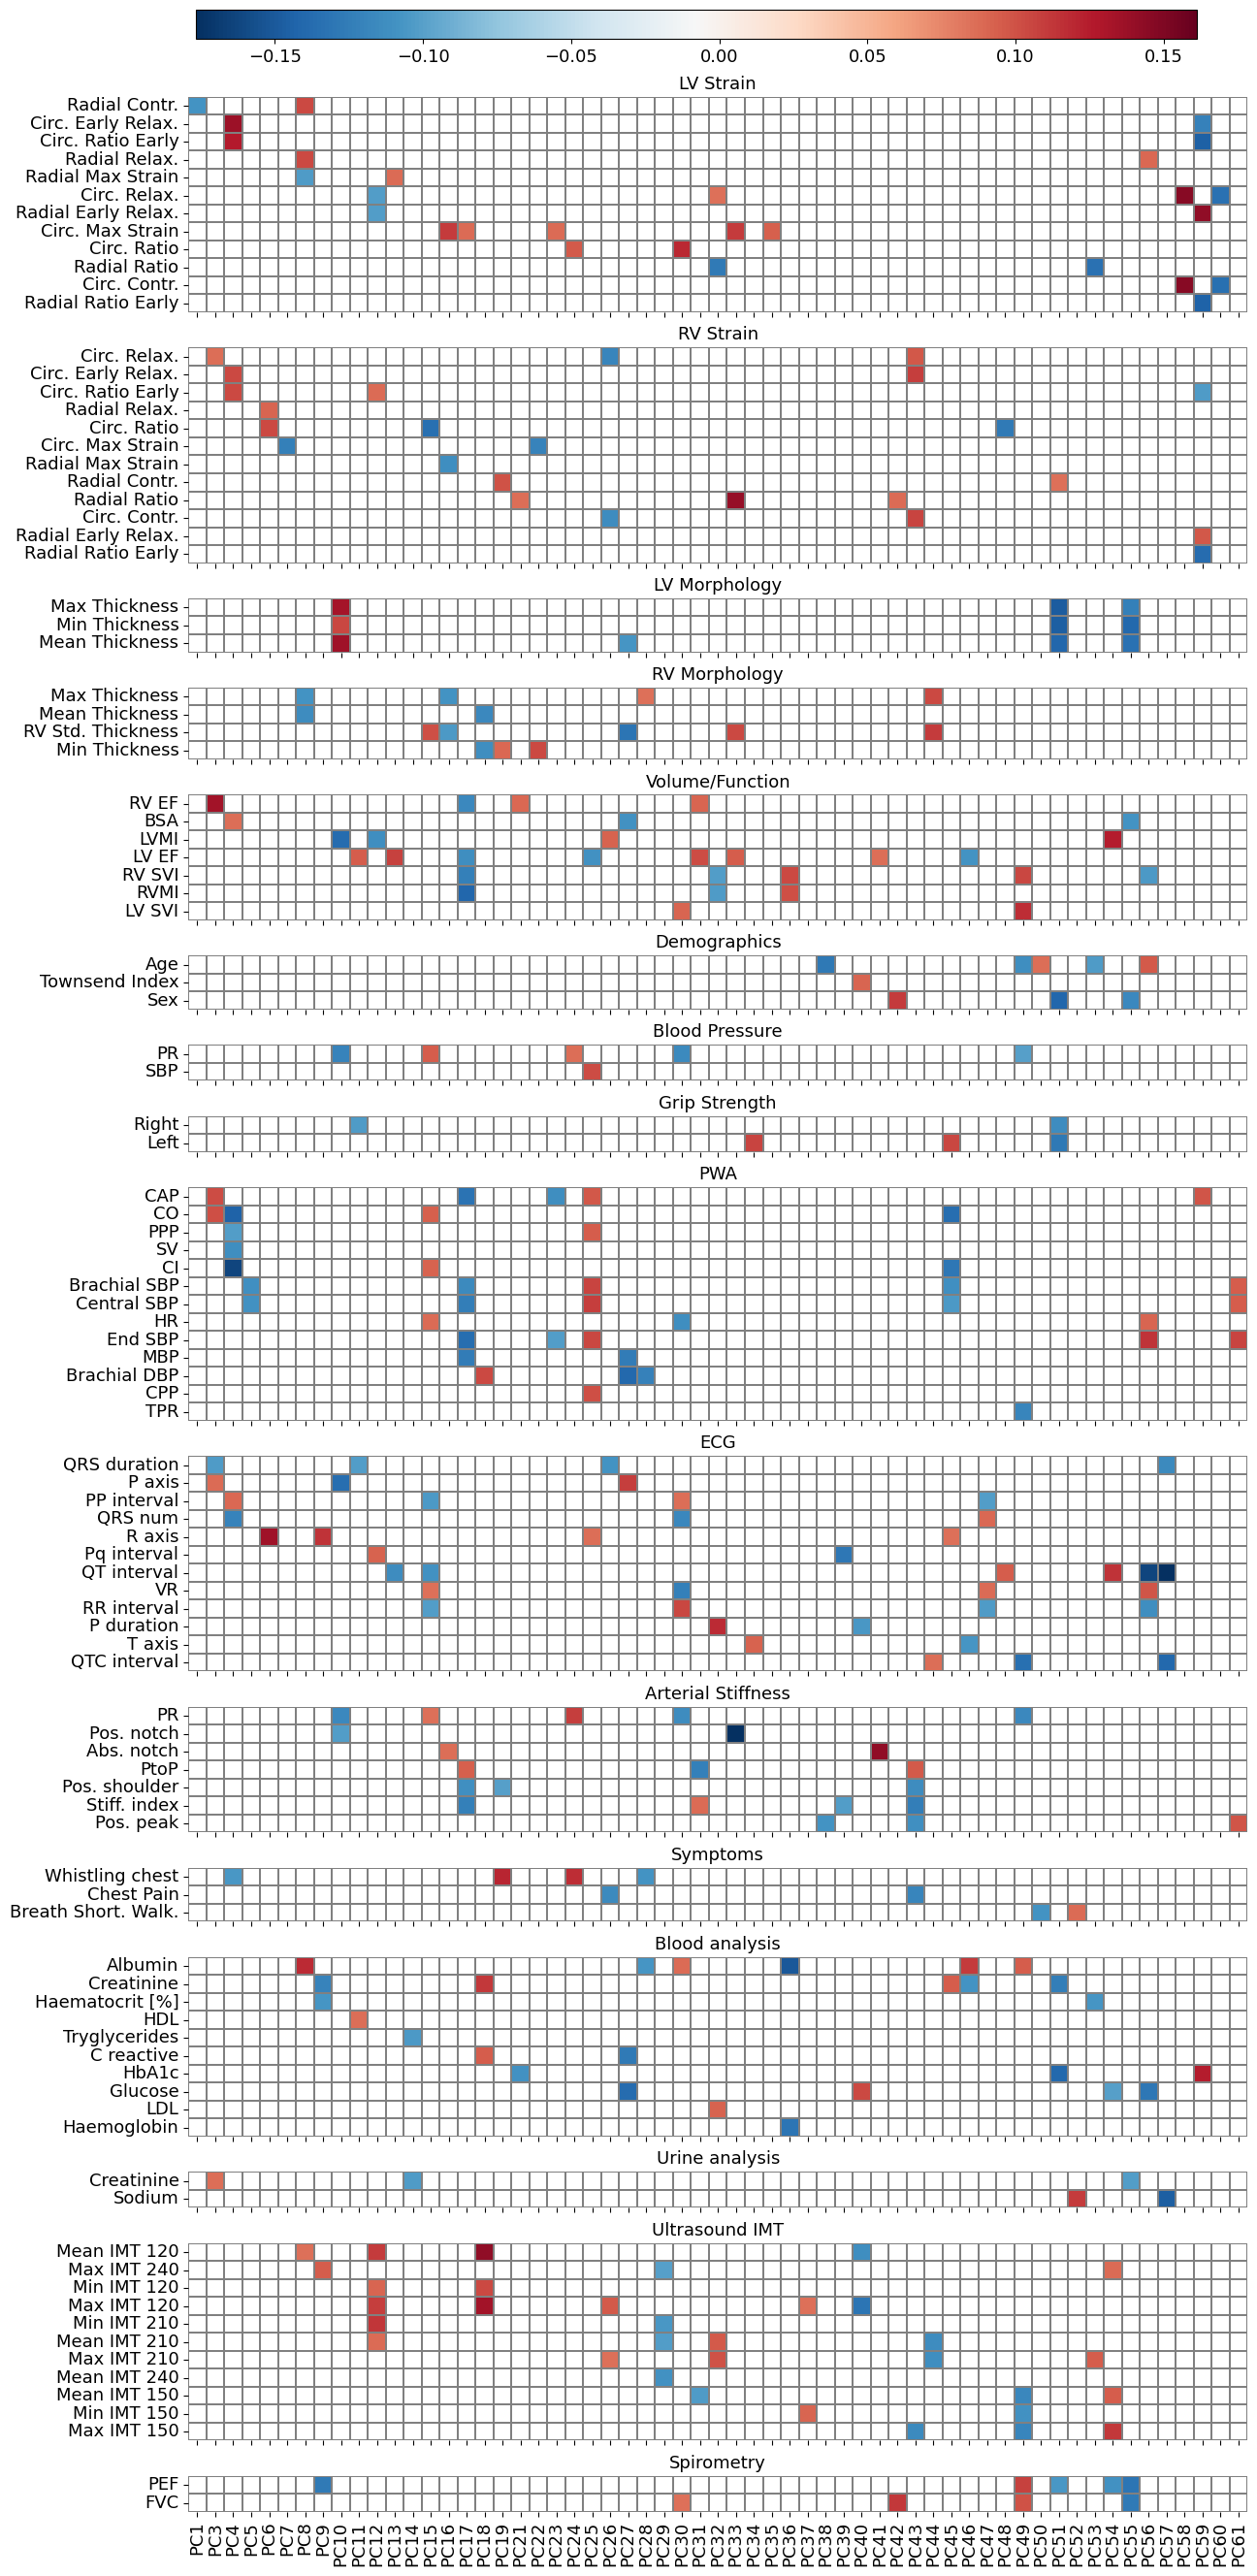

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap


def sort_df_on_columns(df_to_sort):
    ordered_vars = []
    seen = set()
    # Iterate through PCs (columns) left to right
    for pc in df_to_sort.columns:
        # Identify variables with meaningful correlation
        candidates = df_to_sort.index[df_to_sort[pc].abs() > thresh]
        
        # Add to ordered list only if not seen before
        for var in candidates:
            if var not in seen:
                ordered_vars.append(var)
                seen.add(var)

    # Optional: Add the remaining variables (with no strong correlations)
    remaining = [v for v in df_to_sort.index if v not in seen]
    ordered_vars.extend(remaining)

    return ordered_vars


def wrap_label(label, width=25):
    return '\n'.join(textwrap.wrap(label, width))


fontsize_labels = 13
mpl.rcParams.update({
    'axes.titlesize': fontsize_labels,
    'axes.labelsize': fontsize_labels,
    'xtick.labelsize': fontsize_labels,
    'ytick.labelsize': fontsize_labels,
    'legend.fontsize': fontsize_labels
})

cmap = 'RdBu_r'

# Assume heatmap_data and group_map_ukb are already defined
# groups = set(group_map_ukb.values())
grouped_vars = [
    [var for var, g in group_map_ukb.items() if g == group and var in heatmap_data.index]
    for group in group_order
]
grouped_vars = [g for g in grouped_vars if g]
groups = [g for g, vars_ in zip(group_order, grouped_vars) if vars_]

# Sort variables within each group by correlation to first few PCs
sorted_grouped_vars = []
for vars_ in grouped_vars:
    corr_matrix = heatmap_data.loc[vars_, heatmap_data.columns]
    sorted_vars = sort_df_on_columns(corr_matrix.copy())
    # candidates = heatmap_data.index[heatmap_data[pc].abs() > thresh]
    # sort_order = np.argsort(-np.abs(corr_matrix.iloc[:, :5].values).sum(axis=1))
    # sorted_vars = [vars_[i] for i in sort_order]
    sorted_grouped_vars.append(sorted_vars)

row_height = 0.5  # Reduce from 1
height_ratios = np.array([len(group) for group in sorted_grouped_vars])
height_ratios = height_ratios / height_ratios.sum()  # Normalize to sum to 1

total_height = 30  # Fixed height; you can tweak this
# fig_width = 20     # Optional, or based on number of PCs
fig_width = heatmap_data.shape[1] * 0.5

fig, axes = plt.subplots(
    nrows=len(groups),
    figsize=(fig_width, total_height),
    gridspec_kw={'height_ratios': height_ratios},
    sharex=True
)

if len(groups) == 1:
    axes = [axes]

vmin, vmax = heatmap_data.min().min(), heatmap_data.max().max()
# heatmap_plot = heatmap_data.copy()
# heatmap_plot.rename(index=pretty_names, inplace=True)

for ax, group, vars_in_group in zip(axes, groups, sorted_grouped_vars):
    heatmap_gdata = heatmap_data.loc[vars_in_group].copy()
    sns.heatmap(
        heatmap_gdata,
        ax=ax,
        cmap=cmap,
        center=0,
        vmin=vmin,
        vmax=vmax,
        linewidths=0.2,
        linecolor='gray',
        square=True,
        cbar=False,
        xticklabels=True,
        yticklabels=True
    )
    ax.set_title(group, fontsize=fontsize_labels, loc='center')
    ax.set_ylabel("")
    ax.set_xlabel("")  # keep blank here; we'll set it at the bottom manually

    n_rows = heatmap_gdata.shape[0]
    heatmap_plot = heatmap_gdata.copy()
    heatmap_plot.rename(index=pretty_names_ukb, inplace=True)
    ax.set_yticks(np.arange(n_rows) + 0.5)
    ax.set_yticklabels(heatmap_plot.index, fontsize=fontsize_labels, va='center')
    # wrapped_labels = [wrap_label(lbl, width=30) for lbl in heatmap_plot.index]
    # ax.set_yticklabels(wrapped_labels, fontsize=fontsize_labels, va='center')

# fig.tight_layout()

# Add colorbar on top, stretched
fig.subplots_adjust(top=0.94, hspace=0.3)
# fig.subplots_adjust(hspace=1)
cbar_ax = fig.add_axes([0.33, 0.96, 0.35, 0.01])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fig.colorbar(sm, cax=cbar_ax, orientation='horizontal', label='Correlation')
fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')

plt.show()


fig.savefig(os.path.join(save_folder_plots, 'ukb_spearman_aha.eps'), format='eps', dpi=300, bbox_inches='tight')

In [65]:
pretty_names_acdc = {v: prettify_name(v) for v in all_vars_acdc} 
pretty_names_ukb = {v: prettify_name(v) for v in all_vars_ukb}
acdc_table = univariate_df_acdc[univariate_df_acdc["Significant_NC"]].copy()
# acdc_table.rename(pretty_names_acdc, inplace=True)
acdc_table["Y_var"] = acdc_table["Y_var"].replace(pretty_names_acdc)

# Format for LaTeX
df_latex = acdc_table[["PC", "Y_var", "Correlation", "p_value", "p_value_corrected"]].copy()
df_latex.columns = ["PC", "Variable", "Spearman $\\rho$", "p-value", "p-value (corrected)"]

# Round numeric columns
df_latex["Spearman $\\rho$"] = df_latex["Spearman $\\rho$"].round(2)
df_latex["p-value"] = df_latex["p-value"].apply(lambda x: f"{x:.2g}")
df_latex["p-value (corrected)"] = df_latex["p-value (corrected)"].apply(lambda x: f"{x:.2g}")

# Reset index
df_latex.reset_index(inplace=True, drop=True)

# Sort by raw p-value
df_latex = df_latex.sort_values(by="p-value", key=lambda x: x.astype(float))

# Reset index after sorting
df_latex.reset_index(drop=True, inplace=True)

print(df_latex.to_latex(index=False, escape=False))

\begin{tabular}{llrll}
\toprule
PC & Variable & Spearman $\rho$ & p-value & p-value (corrected) \\
\midrule
PC16 & RV Min Thickness & -0.320000 & 8e-05 & 0.076 \\
PC17 & RV EF & 0.310000 & 9.6e-05 & 0.076 \\
PC16 & RV Mean Thickness & -0.270000 & 0.00068 & 0.36 \\
PC22 & RV SVI & 0.270000 & 0.00093 & 0.37 \\
PC17 & RV Strain - Circ. Relax. & 0.250000 & 0.0018 & 0.56 \\
PC17 & RV Strain - Circ. Contr. & 0.250000 & 0.0022 & 0.57 \\
PC16 & RV Max Thickness & -0.240000 & 0.0035 & 0.79 \\
PC36 & RV Mean Thickness & 0.230000 & 0.0046 & 0.92 \\
PC12 & LV SVI & 0.230000 & 0.0053 & 0.93 \\
PC36 & RV Min Thickness & 0.220000 & 0.0058 & 0.93 \\
PC16 & RV Radial Max Strain & 0.220000 & 0.0077 & 0.99 \\
PC36 & RV Max Thickness & 0.220000 & 0.0077 & 0.99 \\
PC39 & LV Strain - Circ. Ratio & -0.210000 & 0.01 & 0.99 \\
PC38 & LV Strain - Radial Contr. & 0.200000 & 0.013 & 0.99 \\
PC16 & RV Strain - Radial Contr. & -0.200000 & 0.014 & 0.99 \\
PC2 & LV Radial Max Strain & 0.200000 & 0.014 & 0.99 \\
PC31 

In [66]:
pretty_names_acdc = {v: prettify_name(v) for v in all_vars_acdc} 
pretty_names_ukb = {v: prettify_name(v) for v in all_vars_ukb}
ukb_table = univariate_df_ukb[univariate_df_ukb["Significant_NC"]].copy()
# acdc_table.rename(pretty_names_acdc, inplace=True)
ukb_table["Y_var"] = ukb_table["Y_var"].replace(pretty_names_ukb)

# Format for LaTeX
df_latex = ukb_table[["PC", "Y_var", "Correlation", "p_value", "p_value_corrected"]].copy()
df_latex.columns = ["PC", "Variable", "Spearman $\\rho$", "p-value", "p-value (corrected)"]

# Round numeric columns
df_latex["Spearman $\\rho$"] = df_latex["Spearman $\\rho$"].round(2)
df_latex["p-value"] = df_latex["p-value"].apply(lambda x: f"{x:.2g}")
df_latex["p-value (corrected)"] = df_latex["p-value (corrected)"].apply(lambda x: f"{x:.2g}")

# Reset index
df_latex.reset_index(inplace=True, drop=True)

# Sort by raw p-value
df_latex = df_latex.sort_values(by="p-value", key=lambda x: x.astype(float))

# Reset index after sorting
df_latex.reset_index(drop=True, inplace=True)

print(df_latex.to_latex(index=False, escape=False))

\begin{tabular}{llrll}
\toprule
PC & Variable & Spearman $\rho$ & p-value & p-value (corrected) \\
\midrule
PC33 & AS - Pos. notch & -0.180000 & 0.00031 & 1 \\
PC57 & ECG - QT interval & -0.170000 & 0.00036 & 1 \\
PC56 & ECG - QT interval & -0.160000 & 0.001 & 1 \\
PC4 & PWA - CI & -0.160000 & 0.001 & 1 \\
PC58 & LV Strain - Circ. Relax. & 0.160000 & 0.001 & 1 \\
PC58 & LV Strain - Circ. Contr. & 0.160000 & 0.0011 & 1 \\
PC41 & AS - Abs. notch & 0.160000 & 0.0014 & 1 \\
PC18 & US - mean IMT 120 & 0.160000 & 0.0015 & 1 \\
PC59 & LV Strain - Radial Early Relax. & 0.160000 & 0.0015 & 1 \\
PC33 & RV Strain - Radial Ratio & 0.150000 & 0.0019 & 1 \\
PC4 & LV Strain - Circ. Early Relax. & 0.150000 & 0.0022 & 1 \\
PC36 & Blood  albumin & -0.150000 & 0.0023 & 1 \\
PC10 & LV Mean Thickness & 0.150000 & 0.0023 & 1 \\
PC6 & ECG - R axis & 0.150000 & 0.0024 & 1 \\
PC3 & RV EF & 0.150000 & 0.0026 & 1 \\
PC18 & US - max IMT 120 & 0.150000 & 0.0027 & 1 \\
PC51 & LV Max Thickness & -0.150000 & 0.0028 &

In [68]:
combined_df

,R2_train,R2_perm_mean,R2_perm_std,p_value,fdr_corrected_p,sig_marker,r2_diff,neg_log_p,Dataset
LV Strain - Radial Contr.,0.182533,0.148943,0.025490,0.099502,0.981075,*,0.033589,1.002166,UKB
LV Strain - Circ. Contr.,0.196498,0.150332,0.024779,0.034826,0.981075,*,0.046166,1.458098,UKB
LV Strain - Radial Relax.,0.175955,0.147982,0.023997,0.119403,0.981075,,0.027973,0.922985,UKB
LV Strain - Circ. Relax.,0.194558,0.146978,0.026836,0.049751,0.981075,*,0.047581,1.303196,UKB
LV Strain - Radial Early Relax.,0.126161,0.147981,0.022907,0.810945,1.000000,,-0.021821,0.091008,UKB
...,...,...,...,...,...,...,...,...,...
RV EF,0.189627,0.272853,0.050961,0.950249,0.985075,,-0.083225,0.022163,ACDC
LV SVI,0.292714,0.272329,0.050264,0.278607,0.985075,,0.020385,0.555008,ACDC
LV EF,0.281823,0.272378,0.043474,0.457711,0.985075,,0.009445,0.339408,ACDC
RVMI,0.229839,0.274697,0.049441,0.781095,0.985075,,-0.044858,0.107296,ACDC


In [79]:
# Replace index with pretty names if not already done
combined_df_latex = combined_df.copy()
combined_df_latex.reset_index(inplace=True)
combined_df_latex.rename(columns={'index': 'Variable'}, inplace=True)
# combined_df["Variable"] = combined_df["Variable"].replace(pretty_names_acdc)

print(combined_df_latex)

# Select and rename relevant columns
latex_df = combined_df_latex[[
    "Variable", "R2_train", "R2_perm_mean", "R2_perm_std", "p_value", "fdr_corrected_p", "r2_diff", "Dataset"
]].copy()

rename_latex = {
    "Variable": "Variable",
    "R2_train": r"$R^2_{\mathrm{train}}$",
    "R2_perm_mean": r"$R^2_{\mathrm{perm}}$",
    "R2_perm_std": "Perm. Std",
    "p_value": "p-value",
    "fdr_corrected_p": "FDR-corrected",
    "r2_diff": "R2 Difference",
    "Dataset": "Dataset"    
}
latex_df = latex_df.rename(columns=rename_latex)

# Format numeric columns
latex_df[r"$R^2_{\mathrm{train}}$"] = latex_df[r"$R^2_{\mathrm{train}}$"].round(2)
latex_df[r"$R^2_{\mathrm{perm}}$"] = latex_df[r"$R^2_{\mathrm{perm}}$"].round(2)
latex_df["Perm. Std"] = latex_df["Perm. Std"].round(2)
latex_df["R2 Difference"] = latex_df["R2 Difference"].round(2)
latex_df["p-value"] = latex_df["p-value"].apply(lambda x: f"{x:.2g}")
latex_df["FDR-corrected"] = latex_df["FDR-corrected"].apply(lambda x: f"{x:.2g}")

# Sort by p-value
latex_df = latex_df.sort_values(by="p-value", key=lambda x: x.astype(float))

# Reset index and print LaTeX
latex_df.reset_index(drop=True, inplace=True)
print(latex_df.to_latex(index=False, escape=False))

     level_0                         Variable  R2_train  R2_perm_mean  \
0          0        LV Strain - Radial Contr.  0.182533      0.148943   
1          1         LV Strain - Circ. Contr.  0.196498      0.150332   
2          2        LV Strain - Radial Relax.  0.175955      0.147982   
3          3         LV Strain - Circ. Relax.  0.194558      0.146978   
4          4  LV Strain - Radial Early Relax.  0.126161      0.147981   
..       ...                              ...       ...           ...   
147      147                            RV EF  0.189627      0.272853   
148      148                           LV SVI  0.292714      0.272329   
149      149                            LV EF  0.281823      0.272378   
150      150                             RVMI  0.229839      0.274697   
151      151                             LVMI  0.338119      0.271387   

     R2_perm_std   p_value  fdr_corrected_p sig_marker   r2_diff  neg_log_p  \
0       0.025490  0.099502         0.981075 

In [84]:
# Sort by p-value
latex_df = latex_df.sort_values(by="p-value", key=lambda x: x.astype(float))
latex_df[latex_df["p-value"].astype(float) < 0.15]

# Reset index and print LaTeX
# latex_df.reset_index(drop=True, inplace=True)
print(latex_df[latex_df["p-value"].astype(float) < 0.15].to_latex(index=False, escape=False))

\begin{tabular}{lrrrllrl}
\toprule
Variable & $R^2_{\mathrm{train}}$ & $R^2_{\mathrm{perm}}$ & Perm. Std & p-value & FDR-corrected & R2 Difference & Dataset \\
\midrule
ECG - QRS duration & 0.210000 & 0.150000 & 0.030000 & 0.02 & 0.98 & 0.060000 & UKB \\
ECG - QT interval & 0.210000 & 0.150000 & 0.020000 & 0.025 & 0.98 & 0.060000 & UKB \\
LV Strain - Circ. Contr. & 0.200000 & 0.150000 & 0.020000 & 0.035 & 0.98 & 0.050000 & UKB \\
ECG - PP interval & 0.200000 & 0.150000 & 0.030000 & 0.045 & 0.98 & 0.050000 & UKB \\
LV Strain - Circ. Relax. & 0.190000 & 0.150000 & 0.030000 & 0.05 & 0.98 & 0.050000 & UKB \\
AS - PtoP & 0.220000 & 0.150000 & 0.040000 & 0.065 & 0.98 & 0.070000 & UKB \\
LVMI & 0.340000 & 0.270000 & 0.050000 & 0.085 & 0.99 & 0.070000 & ACDC \\
LV Strain - Radial Contr. & 0.180000 & 0.150000 & 0.030000 & 0.1 & 0.98 & 0.030000 & UKB \\
LVMI & 0.180000 & 0.150000 & 0.030000 & 0.11 & 0.98 & 0.030000 & UKB \\
US - max IMT 120 & 0.180000 & 0.150000 & 0.030000 & 0.11 & 0.98 & 0.0400

In [88]:
len(univariate_df_acdc['PC'].unique())
len(univariate_df_ukb['PC'].unique())

61